# Análise de Dados Eleitorais Manaus 1o turno

Meus contatos: https://linktr.ee/fmasanori

Agradecimentos à primeira turma do curso Desenvolvimento em Software Multiplataforma, da FATEC São José dos Campos, que desenvolveu este projeto, inicialmente para a [TV Vanguarda](http://vanguarda.tv/). Em especial à Monique Carniello.

ATENÇÃO: na primeira tela de instalação do Python, habilite a opção PATH, note que **não** é o padrão.

Instalar o Python 3.6 ou superior (sugerimos não usar Anaconda) <br>
https://python.org.br/instalacao-windows/ <br>
https://python.org.br/instalacao-linux/ <br>
https://python.org.br/instalacao-mac/ <br>

Após instalar o Python, abra o terminal (Linha de Comando) e instale as bibliotecas necessárias:<br>
<br>
**pip install pandas matplotlib jupyter numpy**

Arquivos necessários:<br> 
https://cdn.tse.jus.br/estatistica/sead/odsele/perfil_eleitor_secao/perfil_eleitor_secao_ATUAL_AM.zip
https://cdn.tse.jus.br/estatistica/sead/eleicoes/eleicoes2022/buweb/bweb_1t_AM_051020221321.zip<br>
<br>
**Descompactar em c:\users\seunome**<br>
<br>

# Primeira parte: Perfil do Eleitorado
<br>
<br>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
estado = pd.read_csv("perfil_eleitor_secao_ATUAL_AM.csv", 
                 usecols = '''NR_ZONA NR_SECAO NM_MUNICIPIO DS_FAIXA_ETARIA DS_ESTADO_CIVIL DS_GRAU_ESCOLARIDADE 
                 QT_ELEITORES_INC_NM_SOCIAL QT_ELEITORES_PERFIL'''.split(),
                 sep=";", on_bad_lines = 'skip', encoding='Latin 1')
municipio = estado.query('NM_MUNICIPIO == "MANAUS"')
municipio = municipio.drop(columns = 'NM_MUNICIPIO')

In [3]:
municipio.sample(20)

,NR_ZONA,NR_SECAO,DS_ESTADO_CIVIL,DS_FAIXA_ETARIA,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_INC_NM_SOCIAL
1080805,40,415,SOLTEIRO,60 a 64 anos,ENSINO MÉDIO COMPLETO,3,0
136919,32,683,SOLTEIRO,19 anos,ENSINO MÉDIO COMPLETO,2,0
29088,32,907,CASADO,45 a 49 anos,SUPERIOR INCOMPLETO,1,0
950799,58,756,CASADO,45 a 49 anos,ENSINO MÉDIO COMPLETO,6,0
831191,63,770,SOLTEIRO,50 a 54 anos,ENSINO FUNDAMENTAL INCOMPLETO,2,0
73212,32,930,SOLTEIRO,30 a 34 anos,ENSINO FUNDAMENTAL INCOMPLETO,5,0
201335,1,800,SOLTEIRO,30 a 34 anos,SUPERIOR COMPLETO,5,0
218330,1,782,SOLTEIRO,65 a 69 anos,ENSINO MÉDIO COMPLETO,3,0
545257,70,746,CASADO,50 a 54 anos,ENSINO MÉDIO COMPLETO,1,0
1030611,65,467,SOLTEIRO,18 anos,ENSINO MÉDIO COMPLETO,1,0


## Faixa Etária 


In [4]:
FaixaEtaria = municipio.groupby(['DS_FAIXA_ETARIA'])['QT_ELEITORES_PERFIL'].sum()
FaixaEtaria

DS_FAIXA_ETARIA
100 anos ou mais        32
16 anos               8637
17 anos              16406
18 anos              24333
19 anos              28095
20 anos              29690
21 a 24 anos        137170
25 a 29 anos        174068
30 a 34 anos        156352
35 a 39 anos        166364
40 a 44 anos        162709
45 a 49 anos        135285
50 a 54 anos        109253
55 a 59 anos         89516
60 a 64 anos         69129
65 a 69 anos         50871
70 a 74 anos         32857
75 a 79 anos         15858
80 a 84 anos          6190
85 a 89 anos          2363
90 a 94 anos           636
95 a 99 anos           122
Inválido                22
Name: QT_ELEITORES_PERFIL, dtype: int64

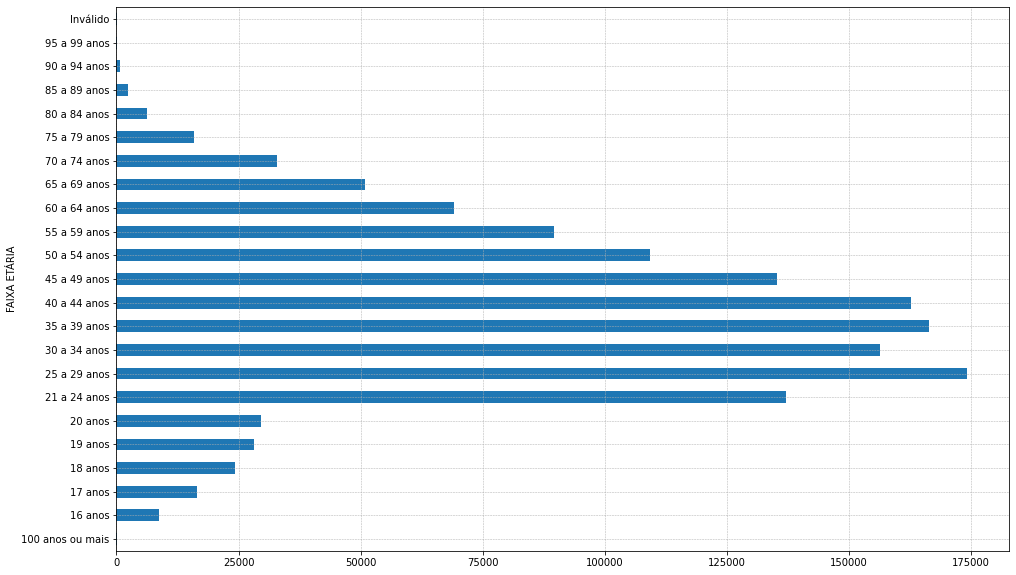

In [5]:
FaixaEtaria.plot(kind='barh', figsize=(16,10))
plt.ylabel('FAIXA ETÁRIA')
plt.grid(linestyle = '--', linewidth = 0.5)


## Agrupamento da faixa etária

In [6]:
Jovem = FaixaEtaria[1:8] 
Adulto = FaixaEtaria[8:14] 
Idoso = FaixaEtaria[14:22] 

In [7]:
FaixasIdade = pd.DataFrame({'Manaus':[Jovem.sum(), Adulto.sum(), Idoso.sum() + int(FaixaEtaria[0])]},
                        #somando idosos acima de 100 anos que estão no ínício
                        index = ['Jovens até 29 anos', 'Adultos', 'Idosos a partir de 60'])
FaixasIdade

,Manaus
Jovens até 29 anos,418399
Adultos,819479
Idosos a partir de 60,178058


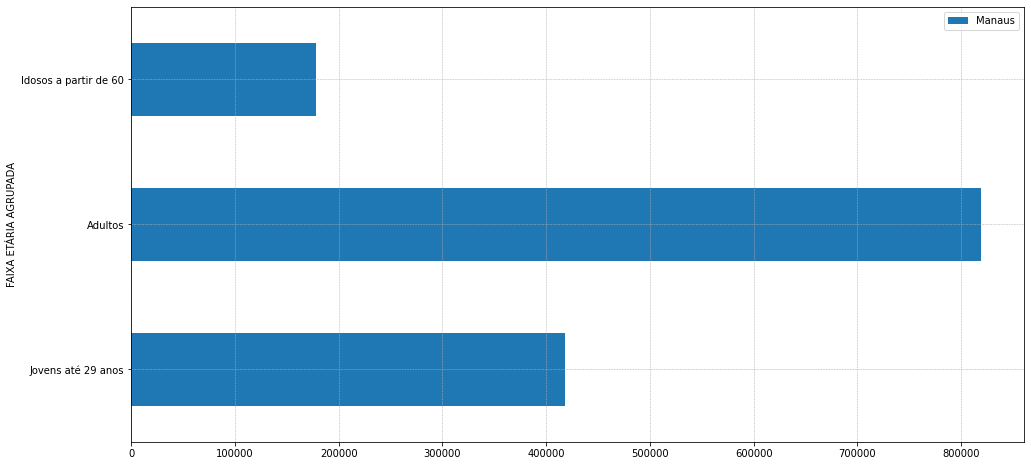

In [8]:
FaixasIdade.plot(kind='barh', figsize=(16,8))
plt.ylabel('FAIXA ETÁRIA AGRUPADA')
plt.grid(linestyle = '--', linewidth = 0.5)


## Zonas Eleitorais com mais jovens e mais idosos

In [9]:
jovens = {}
for zona in municipio.NR_ZONA.unique():
    result = municipio.query('NR_ZONA == @zona').groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum()
    jovens[zona] = result[1:8].sum()
for zona in sorted(jovens, key=lambda x:jovens[x], reverse = True):
    print (f'Zona eleitoral {zona}: {jovens[zona]}')

Zona eleitoral 63: 42241
Zona eleitoral 62: 41857
Zona eleitoral 65: 40988
Zona eleitoral 70: 36323
Zona eleitoral 58: 34724
Zona eleitoral 40: 33027
Zona eleitoral 59: 32868
Zona eleitoral 32: 32825
Zona eleitoral 68: 30207
Zona eleitoral 37: 25196
Zona eleitoral 2: 22892
Zona eleitoral 31: 22889
Zona eleitoral 1: 22362


In [10]:
idosos = {}
for zona in municipio.NR_ZONA.unique():
    result = municipio.query('NR_ZONA == @zona').groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum()
    idosos[zona] = result[14:22].sum() + int(result[0])
for zona in sorted(idosos, key=lambda x:idosos[x], reverse = True):
    print (f'Zona eleitoral {zona}: {idosos[zona]}')

Zona eleitoral 1: 20158
Zona eleitoral 40: 18494
Zona eleitoral 32: 17033
Zona eleitoral 2: 14868
Zona eleitoral 58: 14345
Zona eleitoral 37: 14097
Zona eleitoral 62: 13995
Zona eleitoral 63: 13024
Zona eleitoral 59: 11533
Zona eleitoral 65: 10963
Zona eleitoral 31: 10776
Zona eleitoral 70: 10648
Zona eleitoral 68: 8124


## Estado Civil

In [11]:
EstadoCivil = municipio.groupby('DS_ESTADO_CIVIL')['QT_ELEITORES_PERFIL'].sum().sort_values(ascending=False)
EstadoCivil

DS_ESTADO_CIVIL
SOLTEIRO                  974010
CASADO                    370037
DIVORCIADO                 39134
VIÚVO                      24079
SEPARADO JUDICIALMENTE      8698
Name: QT_ELEITORES_PERFIL, dtype: int64

## Escolaridade


In [12]:
Escolaridade = municipio.groupby(['DS_GRAU_ESCOLARIDADE'])['QT_ELEITORES_PERFIL'].sum().sort_values(ascending = False)
Escolaridade

DS_GRAU_ESCOLARIDADE
ENSINO MÉDIO COMPLETO            528182
ENSINO MÉDIO INCOMPLETO          242232
ENSINO FUNDAMENTAL INCOMPLETO    220687
SUPERIOR COMPLETO                175320
SUPERIOR INCOMPLETO              135080
ENSINO FUNDAMENTAL COMPLETO       71197
LÊ E ESCREVE                      31061
ANALFABETO                        12199
Name: QT_ELEITORES_PERFIL, dtype: int64

## Salvar Dados

In [13]:
FaixasIdade.to_csv('FaixasIdade.csv')
EstadoCivil.to_csv('EstadoCivil.csv')
Escolaridade.to_csv('Escolaridade.csv')

## Nome social


In [14]:
NomeSocial = municipio.groupby(['QT_ELEITORES_INC_NM_SOCIAL'])['QT_ELEITORES_PERFIL'].count()
NomeSocial[1]

382

# Zonas Eleitorais com mais pessoas que utilizam nome social

In [15]:
nome_social = {}
for zona in municipio.NR_ZONA.unique():
    result = municipio.query('NR_ZONA == @zona').groupby('QT_ELEITORES_INC_NM_SOCIAL')['QT_ELEITORES_PERFIL'].count()
    nome_social[zona] = result[1]
for zona in sorted(nome_social, key=lambda x:nome_social[x], reverse = True):
    print (f'Zona eleitoral {zona}: {nome_social[zona]}')

Zona eleitoral 62: 45
Zona eleitoral 40: 44
Zona eleitoral 70: 34
Zona eleitoral 63: 32
Zona eleitoral 1: 32
Zona eleitoral 37: 29
Zona eleitoral 2: 28
Zona eleitoral 32: 25
Zona eleitoral 65: 25
Zona eleitoral 58: 24
Zona eleitoral 31: 24
Zona eleitoral 59: 21
Zona eleitoral 68: 19


# Segunda parte: análise dos boletins de urna do 1o turno
<br>
<br>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
estado = pd.read_csv("bweb_1t_AM_051020221321.csv", 
                 usecols = '''NR_ZONA NR_SECAO NM_MUNICIPIO QT_COMPARECIMENTO QT_APTOS QT_COMPARECIMENTO 
                 QT_ABSTENCOES NR_VOTAVEL NM_VOTAVEL QT_VOTOS DS_CARGO_PERGUNTA'''.split(),
                 sep=";", on_bad_lines = 'skip', encoding='Latin 1')
municipio = estado.query('NM_MUNICIPIO == "MANAUS" and DS_CARGO_PERGUNTA == "Presidente"')
municipio = municipio.drop(columns = 'NM_MUNICIPIO DS_CARGO_PERGUNTA'.split())

In [18]:
municipio.sample(20)

,NR_ZONA,NR_SECAO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS
563398,40,510,422,372,50,14,PADRE KELMON,1
506759,37,658,393,348,45,95,Branco,6
722530,59,570,390,345,45,16,VERA,1
977657,68,589,390,328,62,12,CIRO GOMES,12
60879,2,569,343,294,49,44,SORAYA THRONICKE,2
343808,31,555,383,336,47,12,CIRO GOMES,10
748617,59,713,390,316,74,15,SIMONE TEBET,4
527128,40,318,421,361,60,30,FELIPE D'AVILA,1
862163,63,639,420,367,53,22,JAIR BOLSONARO,160
384999,32,616,401,359,42,13,LULA,129


In [19]:
municipio.groupby('NM_VOTAVEL')['QT_VOTOS'].sum().sort_values(ascending = False)

NM_VOTAVEL
JAIR BOLSONARO         622846
LULA                   430562
SIMONE TEBET            59854
CIRO GOMES              32622
Nulo                    24314
Branco                  15221
SORAYA THRONICKE        10300
FELIPE D'AVILA           4539
PADRE KELMON             1059
LÉO PÉRICLES              419
SOFIA MANZANO             353
VERA                      331
CONSTITUINTE EYMAEL       212
Name: QT_VOTOS, dtype: int64

In [20]:
votacao = {}
for zona in municipio.NR_ZONA.unique():
    result = municipio.query('NR_ZONA == @zona').groupby('NM_VOTAVEL')['QT_VOTOS'].sum()
    total = sum(result)
    votacao[zona] = {'Jair Bolsonaro': round(result["JAIR BOLSONARO"] / total * 100, 1),
                     'Lula': round(result["LULA"] / total * 100, 1), 
                     'Simone Tebet': round(result['SIMONE TEBET'] / total * 100, 1),
                     'Nulos':round(result['Nulo'] / total * 100, 1), 
                     'Brancos':round(result['Branco'] / total * 100, 1)
                    }
votacao = pd.DataFrame(votacao).transpose()
votacao

,Jair Bolsonaro,Lula,Simone Tebet,Nulos,Brancos
1,51.7,34.5,6.0,1.9,1.2
2,55.2,31.0,5.9,1.6,1.0
31,50.4,37.2,4.7,2.5,1.4
32,51.8,35.8,5.4,1.9,1.2
37,51.6,35.0,5.4,2.1,1.3
40,54.1,33.2,5.3,1.8,1.1
58,53.8,33.7,5.1,1.9,1.2
59,49.5,38.3,4.7,2.3,1.5
62,52.2,35.9,4.7,1.9,1.2
63,50.5,37.9,4.5,2.1,1.3


In [21]:
votacao['Jair Bolsonaro'].sort_values(ascending = False)

2     55.2
40    54.1
58    53.8
62    52.2
32    51.8
1     51.7
37    51.6
70    51.6
65    51.3
63    50.5
31    50.4
59    49.5
68    48.9
Name: Jair Bolsonaro, dtype: float64

In [22]:
votacao['Lula'].sort_values(ascending = False)

68    39.9
59    38.3
63    37.9
31    37.2
65    37.1
70    36.1
62    35.9
32    35.8
37    35.0
1     34.5
58    33.7
40    33.2
2     31.0
Name: Lula, dtype: float64

In [23]:
print (f"Porcentagem de comparecimento {municipio['QT_COMPARECIMENTO'].sum()/municipio['QT_APTOS'].sum()*100:.2f}%")

Porcentagem de comparecimento 84.80%
